In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.linalg import null_space
import graphviz

pi = math.pi
cos = np.cos
sin = np.sin
exp = np.exp

In [3]:
# num of majority 
N = 1000
# num of minority 
M = 50

r = np.random.rand(N) * 5
s = np.random.rand(N) * 2*pi - pi

r2 = np.random.rand(M) * 2
s2 = np.random.rand(M) * 2*pi - pi

In [4]:
#Generating data
x_major = r * cos (s) 
y_major = r * sin (s)
x_minor = r2 * cos (s2) + 2 
y_minor = r2 * sin (s2) + 2
major = np.hstack((x_major.reshape(N,1),y_major.reshape(N,1))) 
minor = np.hstack((x_minor.reshape(M,1),y_minor.reshape(M,1)))
                  
xy_tot = np.hstack((np.hstack((x_major,x_minor)).reshape(N+M,1) , np.hstack((y_major,y_minor)).reshape(N+M,1) ) )

target_tot = np.vstack(( np.zeros(shape=(N,1)) , np.ones(shape=(M,1))) )


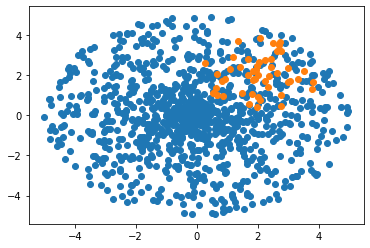

In [5]:
plt.scatter(x_major,y_major)
plt.scatter(x_minor,y_minor)

In [43]:
#Get Centroid for minor data
centroid = np.average(minor,0)
var =np.var(minor,0)
s =  ((major - centroid)**2) / var
s_= np.linalg.norm(s,ord= 2,axis=1)

NEWN = 746


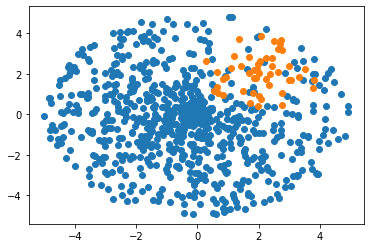

In [59]:
ratio = 0.9

beta = 0.1
newN = N
major_undersample = np.array(major)
s =  ((major - centroid)**2) / var
s_= np.linalg.norm(s,ord= 2,axis=1)

while( newN > M * 15):
    prob = 1 / exp ( 0.2+beta * s_)
    randnum = np.random.rand(newN)
    counter = 0
    for idx in range (0,newN):
        if prob[idx] > randnum[idx]:
            major_undersample = np.delete(major_undersample, idx-counter,0);
            counter +=1
            
    (newN,dum) = major_undersample.shape
    print('NEWN = '+str(newN))
    s =  ((major_undersample - centroid)**2) / var
    s_= np.linalg.norm(s,ord= 2,axis=1)
    beta = beta * ratio
    plt.figure()
    plt.scatter(major_undersample[:,0],major_undersample[:,1])
    plt.scatter(x_minor,y_minor)
 

In [60]:
from sklearn import tree
xy_undersampled = np.vstack((major_undersample,minor))
target_undersampled = np.vstack(( np.zeros(shape=(newN,1)) , np.ones(shape=(M,1))) )

clf2 = tree.DecisionTreeRegressor(max_depth=3)
clf2 = clf2.fit(xy_undersampled, target_undersampled)
train_result2 =clf2.predict(xy_tot)

In [61]:
#Dicsiontree Result
summer = 0
summer_major = 0
summer_minor = 0
for idx,result_ in enumerate(train_result2):
    #print(result_)
    if result_>0.5:
     #   print(target_tot[idx][0])
        diff = np.abs(1-target_tot[idx][0])
        summer = summer + diff
        
    else :
        diff = np.abs(0-target_tot[idx][0])
        summer = summer + diff
    if target_tot[idx][0] == 1:
        summer_minor += diff
    if target_tot[idx][0] == 0:
        summer_major += diff
        
print( 'Error Ratio for depth 3 dicision tree is : '+ str(summer / (N+M) * 100)  +'% ')
print( 'Major Error Ratio: '+ str(summer_major / (N) * 100)  +'% ')
print( 'Minor Error Ratio: '+ str(summer_minor / (M) * 100)  +'% ')

Error Ratio for depth 3 dicision tree is : 8.571428571428571% 
Major Error Ratio: 8.200000000000001% 
Minor Error Ratio: 16.0% 


In [20]:
major - centroid

array([[-2.15514724, -1.31141071],
       [ 0.93943868,  0.80665834],
       [-1.2013637 , -3.37886834],
       ...,
       [-1.82291671, -5.03529471],
       [-2.00923874, -2.09095745],
       [-1.74696306, -4.64515202]])

In [24]:
s

array([[ 3.28081215,  1.3123424 ],
       [ 0.62339648,  0.49653398],
       [ 1.01947477,  8.71188732],
       ...,
       [ 2.34725959, 19.34726141],
       [ 2.8516128 ,  3.33626163],
       [ 2.15573271, 16.46529717]])

In [35]:
prob

array([2.92010870e-02, 4.50690239e-01, 1.55116435e-04, 3.77008373e-02,
       3.38366951e-01, 4.96692529e-02, 8.85309655e-02, 2.12315890e-07,
       1.33621582e-10, 1.00456288e-10, 1.49462371e-13, 3.35710416e-02,
       4.55732617e-02, 8.16268794e-01, 7.60157560e-03, 7.66283209e-01,
       7.16182659e-04, 1.67018348e-15, 2.75731550e-06, 1.57259439e-02,
       2.60183962e-08, 1.47460910e-02, 2.20444415e-03, 1.62345630e-04,
       9.39250648e-04, 2.56727108e-05, 6.67692589e-16, 4.22155203e-10,
       2.10066068e-02, 2.25957280e-02, 2.01148500e-07, 4.94245388e-03,
       3.16345564e-01, 9.90561754e-07, 7.48013550e-04, 9.70564694e-02,
       7.77867917e-03, 2.40703611e-08, 3.67585345e-14, 1.23898531e-01,
       7.11988362e-06, 5.46090976e-10, 2.28631678e-15, 2.32871962e-02,
       1.29795657e-13, 2.00966651e-04, 9.70183684e-07, 6.65967206e-07,
       4.67227014e-02, 1.29864062e-02, 2.36686938e-10, 4.82396709e-01,
       5.50325868e-08, 2.84956139e-01, 2.77459358e-13, 3.07710256e-01,
      

In [27]:
np.linalg.norm

<function numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)>